
https://www.kaggle.com/sogun3/uspollution

The AQS Data Mart is a database containing all of the information from AQS. It has every measured value the EPA 
has collected via the national ambient air monitoring program. It also includes the associated aggregate values 
calculated by EPA (8-hour, daily, annual, etc.). The AQS Data Mart is a copy of AQS made once per week and made 
accessible to the public through web-based applications. The intended users of the Data Mart are air quality data 
analysts in the regulatory, academic, and health research communities. It is intended for those who need to 
download large volumes of detailed technical data stored at EPA and does not provide any interactive analytical 
tools. It serves as the back-end database for several Agency interactive tools that could not fully function 
without it: AirData, AirCompare, The Remote Sensing Information Gateway, the Map Monitoring Sites KML page, etc.

AQS must maintain constant readiness to accept data and meet high data integrity requirements, thus is limited 
in the number of users and queries to which it can respond. The Data Mart, as a read only copy, can allow wider 
access.

47 states: District of Columbia, Country of Mexica
Missing ['Mississippi', 'Montana', 'Nebraska', 'Vermont', 'West Virginia']

Data was there, there were over about half the values were missing for the Air Quality Index for CO and SO2 but everythig else was there!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('pollution_us_2000_2016.csv')

In [3]:
data.shape

(1746661, 29)

In [4]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
states = data['State'].unique()
states_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
missing = [state for state in states_list if state not in states]
missing

['Guam',
 'Mississippi',
 'Montana',
 'Nebraska',
 'Puerto Rico',
 'Vermont',
 'West Virginia']

In [6]:
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [8]:
data['month-day'] = data['Date Local'].apply(lambda x: x[-5:]) 

In [9]:
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,month-day
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN,01-01
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,01-01
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN,01-01
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0,01-01
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN,01-02


In [10]:
empty_list = []
for i in data.columns:
    empty_list.append((i, data[i].isnull().sum()))
empty_list

[('Unnamed: 0', 0),
 ('State Code', 0),
 ('County Code', 0),
 ('Site Num', 0),
 ('Address', 0),
 ('State', 0),
 ('County', 0),
 ('City', 0),
 ('Date Local', 0),
 ('NO2 Units', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Units', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Units', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 872907),
 ('CO Units', 0),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 873323),
 ('month-day', 0)]

In [11]:
data.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [12]:
state = data[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [13]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [14]:
s

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,
Alabama,9.410693,22.969098,13.158029,21.232246,0.024612,0.038434,9.293026,36.845170,1.034236,4.230198,10.756238,7.005115,0.212607,0.407386,9.446257,3.850288
Alaska,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340
Arizona,19.067975,38.398603,14.230985,36.106987,0.024989,0.043125,10.122022,39.004095,1.364213,2.728664,10.247938,4.213486,0.490616,0.982476,9.511755,9.191023
Arkansas,9.753701,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,1.383302,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914
California,13.651894,25.592142,11.264417,24.110238,0.026053,0.038820,10.204474,35.722673,1.146695,2.331772,8.508692,3.598278,0.447485,0.769284,7.430949,7.405669
Colorado,19.634275,38.079445,10.618961,35.958878,0.023551,0.038193,10.033335,34.673582,1.507634,5.977720,9.037683,10.605523,0.443112,0.814280,8.691912,7.724205
Connecticut,8.990965,19.579982,10.423412,18.457355,0.028920,0.040321,10.459226,37.149400,0.912121,2.327872,10.747269,3.221925,0.250866,0.366647,8.229045,3.586407
Country Of Mexico,20.331830,40.299600,13.217968,37.989060,0.021917,0.036104,9.617505,31.957711,1.945775,4.197170,10.853461,6.565839,0.853503,1.985410,10.312329,17.700525
Delaware,11.584773,23.194050,11.089256,21.541047,0.026494,0.038084,10.110193,35.400000,1.014242,2.189091,10.987052,2.819835,0.261600,0.401025,8.929477,3.839384


In [15]:
day = data[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI','month-day']].copy()

In [18]:
#Mean pollutant state and day
day_state = day.groupby(['State','month-day']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [22]:
byday = data[[
       'month-day','NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [24]:
eachday = byday.groupby('month-day').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [25]:
eachday

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
month-day,,,,,,,,,,,,,,,,
01-01,14.263091,26.077060,11.999760,24.533029,0.018260,0.027635,10.494355,24.043478,1.855096,3.808023,8.465289,5.808929,0.504929,0.927189,9.597886,8.899568
01-02,16.068960,28.125951,13.606644,26.444391,0.016802,0.025704,10.083775,22.340876,1.855401,3.968151,9.760953,6.103996,0.506093,0.885655,10.072701,8.636538
01-03,17.352866,30.193545,13.304432,28.392582,0.016141,0.025093,10.023121,21.843931,2.001940,4.214330,10.356936,6.513487,0.535402,0.971170,9.894027,9.295761
01-04,18.181365,30.359218,12.780888,28.555502,0.015781,0.024686,10.355212,21.517375,2.227607,4.701955,10.296573,7.237337,0.560712,0.993218,8.765444,9.664737
01-05,18.142971,30.567143,12.995238,28.723810,0.015879,0.024660,10.245714,21.487619,2.184287,4.670333,10.294762,7.294146,0.555274,0.999938,9.423333,9.612565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,16.389144,28.488287,13.636319,26.825295,0.016549,0.025432,9.812008,21.997539,1.858420,4.041388,10.333661,6.187408,0.508991,0.894042,9.751969,8.729197
12-28,17.310507,29.335417,13.203790,27.618016,0.016060,0.025340,10.856264,21.938715,2.095416,4.419788,10.179178,6.710772,0.532772,0.932072,9.167610,9.201181
12-29,16.961630,29.448630,12.550391,27.690313,0.016031,0.025224,10.314090,21.838063,2.027011,4.210665,10.221135,6.424450,0.522647,0.929026,9.482877,9.147677


In [36]:
cols = eachday.columns

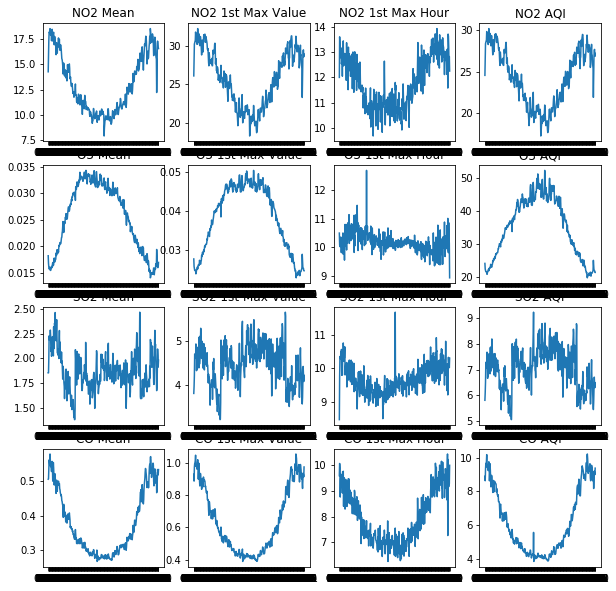

In [48]:
fig, axs = plt.subplots(4,4,figsize=(10,10))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(eachday.index,eachday[col])
    axs[i].set_title(col)
